# SVM-SMOTE

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

Creates new samples by interpolation of samples of the support vectors from minority class and its closest neighbours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

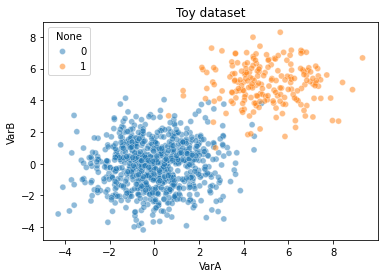

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Find the support vectors

In [4]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X, y)

# support vectors, indeces
clf.support_

array([ 70,  99, 200, 256, 269, 365, 391, 421, 462, 532, 540, 666, 688,
       797, 813, 814, 862, 863, 886, 887, 909, 917, 926, 935, 974, 976,
       983, 994, 999])

In [5]:
# number of support vectors
len(clf.support_)

29

In [6]:
# the support vectors
clf.support_vectors_

array([[2.10702827, 3.73436336],
       [4.46079378, 0.87223642],
       [2.66311489, 3.4559813 ],
       [4.79708034, 3.80628433],
       [1.83436172, 3.11669603],
       [4.47091785, 1.7321185 ],
       [1.9879675 , 3.32338754],
       [3.109471  , 3.75753757],
       [2.42180863, 3.87016389],
       [2.39125222, 2.63662747],
       [4.37419055, 2.45947423],
       [2.28278425, 2.89249078],
       [3.06101238, 2.39118695],
       [0.43548673, 4.03756957],
       [0.639605  , 3.02063661],
       [1.29859028, 4.28344428],
       [4.18274287, 1.83547778],
       [2.28814315, 4.10261413],
       [5.84525141, 1.71668308],
       [2.74149852, 1.00142133],
       [3.2078631 , 3.16923837],
       [1.28619086, 4.60594841],
       [2.68021433, 3.94075152],
       [4.2572463 , 3.00917682],
       [2.9158683 , 4.10649702],
       [4.31816802, 1.88647304],
       [3.9526181 , 3.24539841],
       [2.64175248, 2.61888111],
       [4.73184963, 2.19160354]])

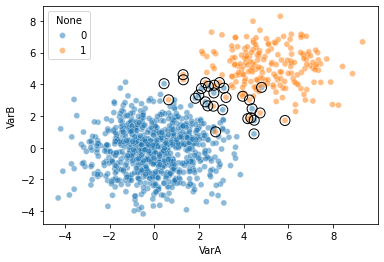

In [7]:
# mark the support vectors

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

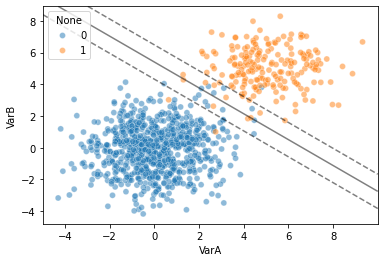

In [8]:
# plot the decision boundaries
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

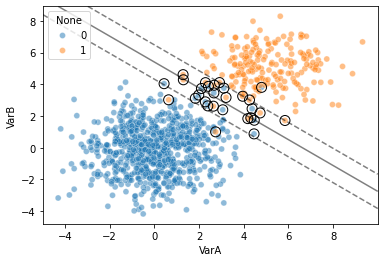

In [9]:
# now we plot the support vectors, whith lie at the and
# within the decision boundaries

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## SVM SMOTE

[SVMSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [10]:
sm = SVMSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5, # neighbours to create the synthetic examples
    m_neighbors=10, # neighbours to determine if minority class is in "danger"
    svm_estimator = svm.SVC(kernel='linear')
)

# remember that the templates are those minority observations
# within the danger zone

# create the synthetic examples
X_res, y_res = sm.fit_resample(X, y)

In [11]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [13]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

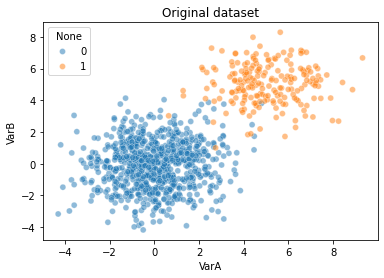

In [14]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

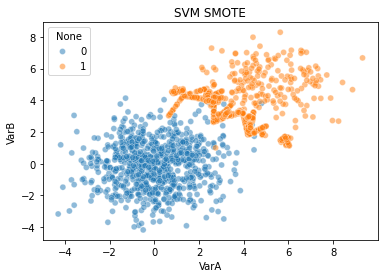

In [15]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

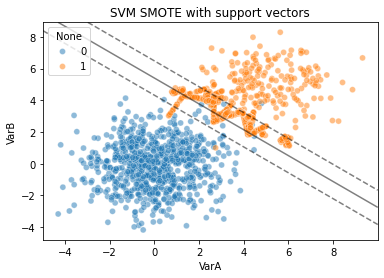

In [16]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()

We can see that most of the synthetic examples were created closer to the support vectors from the minority class, within the decision boundary from the SVM.

**HOMEWORK**

- Test SVM SMOTE using the toy datasets that we created for section 4 and see how the distribution of the newly created data varies with the different separateness of the classes. 